In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NPS Scores
## Summer Academy Data - 2016
Let's start with grabbing information from 2016. It's simple, complete, and needs minimal cleaning.

In [2]:
csv_2017 = pd.read_csv('2017/Student Feedback Surveys-Superview.csv')

def clean_week(input):
    return int(input[-1])

def clean_rating(input):
    try:
        rating = int(input)
        return rating
    except ValueError:
        return False

csv_2017.columns = ['ID', 'Location', 'Track', 'Week', 'Rating', 'Pacing']
csv_2017 = csv_2017.drop(columns=['Pacing'])
csv_2017['Week'] = csv_2017['Week'].apply(clean_week)
csv_2017['Rating'] = csv_2017['Rating'].apply(clean_rating)
csv_2017.head()

,ID,Location,Track,Week,Rating
0,134,San Francisco,"Apps, Explorer",1,3
1,36,Los Angeles,Apps,1,4
2,117,San Francisco,Games,1,4
3,253,NaN,NaN,2,4
4,350,New York City,"Apps, Explorer",1,4


### Mean Ratings Per Week via Lineplot

Below, we look for the average rating per week.

In [3]:
def find_means(data):
    points = []
    for i in range(1, 9):
        points.append(data[data["Week"] == i]["Rating"].mean())
    return np.array(points)

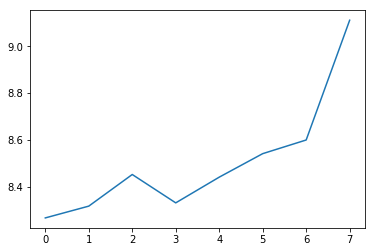

In [4]:
plt.plot(find_means(csv_2017))

## Alt: Mean Ratings Per Week via Linear Regression

Another route is using the regplot. With x-estimator, we can see the mean and standard deviation per week!

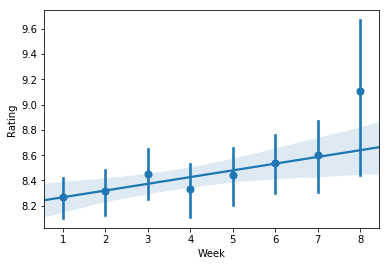

In [5]:
ax_rating = sns.regplot(x='Week', y='Rating', data=csv_2017, x_estimator=np.mean)

In [6]:
print(csv_2017[csv_2017["Week"] == 8]["Rating"].describe())
print(csv_2017[csv_2017["Week"] == 1]["Rating"].describe())

count      9
unique     4
top       10
freq       4
Name: Rating, dtype: int64
count     288
unique      8
top         8
freq       91
Name: Rating, dtype: int64


### NPS scores
#### Converting NPS Scores
Rather than using the mean, let's look at the NPS scores.

NPS scores are an indicator as to whether someone will be a promoter (+1, score 9-10), passive (0, 7-8), or a detractor (-1, <7) of your product.

In [123]:
def nps_convert(input):
    try:
        rating = int(input)
        if(rating <= 6):
            return -1
        elif(rating <= 8):
            return 0
        else:
            return 1
    except:
        return None

csv_2017['NPS'] = csv_2017['Rating'].apply(nps_convert)

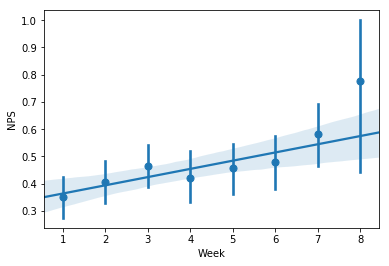

In [112]:
ax_nps = sns.regplot(x='Week', y='NPS', data=csv_2017, x_estimator=np.mean)

## Summer Academy Data - 2016
Now, a little tougher; let's try to find a way to pull all the mesh of data together from the .csvs

In [150]:
import glob

week_csv = [[] for _ in range(8)]

def rating_reformat(rating, scale=10):
    try:
        return int(rating) * int(10 / scale)
    except: 
        return None
        
def week_cleaner(data, week, scale=10):
    # Renaming of columns
    rating_string1 = 'How would you rate your overall satisfaction with the Summer Academy this week?'
    rating_string2 = 'How likely is it that you would recommend the Make School Summer Academy to a friend?'
    pacing_string1 = 'How well are the tutorials paced?'
    pacing_string2 = 'How well is the schedule paced?'
    track_string = 'What track are you in?'
    
    # Let's rename the columns
    rename = { rating_string1:'Rating', rating_string2:'Rating', pacing_string1:'Pacing', \
              pacing_string2:'Pacing', track_string:'Track'}
    data = data.rename(columns=rename)
    
    # New columns: keep track of week, rework rating, create NPS
    data['Week'] = week
    data['Rating'] = data['Rating'].apply(rating_reformat, scale=scale)
    if week == 3:
        display(data)
    data['NPS'] = data['Rating'].apply(nps_convert)
    
    # Insert drops here
    drop = []
    if 'Pacing' in data.columns:
        drop.append('Pacing')
    if 'Timestamp' in data.columns:
        drop.append('Timestamp')
    if 'Unnamed: 0' in data.columns:
        drop.append('Unnamed: 0')
    if 'location' in data.columns:
        drop.append('location')
    if 'Track' in data.columns:
        drop.append('Track')
    
    data = data.drop(columns=drop)

    return data

for i in range(1, 8):
    weekly_csv_filenames = glob.glob('2016/Anon Week {}*.csv'.format(i))
    week_csv[i-1] = []

    for location in weekly_csv_filenames:
        data = pd.read_csv(location)
        week_csv[i-1].append(week_cleaner(data, week=i, scale=5))
        
    week_csv[i-1] = pd.concat(week_csv[i-1], sort=True)

week8 = pd.read_csv('2016/Week 8 Feedback (2016, incomplete) - results.csv')
week8 = week8.drop(columns=['#', 'track', 'Network ID', 'Start Date (UTC)', 'Submit Date (UTC)'])
week_csv[7] = week_cleaner(week8, week=8)

csv_2016 = pd.concat(week_csv, sort=True, ignore_index=True)

,Timestamp,Track,Rating,Pacing,Week
0,7/8/2016 6:21:11,Apps,8,3,3
1,7/8/2016 6:21:29,Apps,10,3,3
2,7/8/2016 6:21:35,Intro,8,3,3
3,7/8/2016 6:21:46,Apps,10,3,3
4,7/8/2016 6:22:10,Apps,8,2,3
5,7/8/2016 6:22:35,Games,8,4,3
6,7/8/2016 6:22:50,Intro,8,4,3
7,7/8/2016 6:23:09,Apps,10,3,3
8,7/8/2016 6:23:28,Games,8,4,3
9,7/8/2016 6:23:49,Intro,8,4,3


,Timestamp,Rating,Pacing,Week
0,7/8/2016 10:31:27,8,2,3
1,7/8/2016 13:45:52,8,4,3
2,7/8/2016 13:47:42,8,3,3
3,7/8/2016 13:47:59,8,3,3
4,7/8/2016 14:12:24,8,3,3
5,7/8/2016 14:13:39,10,4,3


,Track,Timestamp,Rating,Pacing,Week
0,Apps,7/8/2016 15:56:20,6,2,3
1,Apps,7/8/2016 16:02:55,10,3,3
2,Apps,7/8/2016 16:19:51,6,3,3
3,Apps,7/8/2016 16:34:12,2,3,3
4,Apps,7/8/2016 16:39:27,10,2,3
5,Apps,7/8/2016 16:46:21,10,5,3
6,Apps,7/8/2016 17:33:28,6,5,3
7,Apps,7/9/2016 14:23:38,10,3,3
8,Apps,7/10/2016 20:55:08,10,3,3
9,Games,7/8/2016 15:58:04,10,3,3


,Timestamp,Rating,Pacing,Week
0,7/8/2016 7:36:11,8,3,3
1,7/8/2016 22:05:05,10,3,3


,Timestamp,Track,Rating,Pacing,Week
0,7/8/2016 12:52:08,Games,10.0,2,3
1,7/9/2016 15:22:45,Apps,10.0,3,3
2,7/8/2016 21:26:01,Games,8.0,3,3
3,7/8/2016 13:52:01,Apps,8.0,3,3
4,7/8/2016 14:00:28,Apps,8.0,4,3
5,7/8/2016 14:42:40,Apps,10.0,3,3
6,7/8/2016 14:03:46,Apps,8.0,4,3
7,7/8/2016 16:40:10,Apps,6.0,4,3
8,7/8/2016 13:58:12,Apps,8.0,4,3
9,7/8/2016 13:53:19,Apps,6.0,4,3


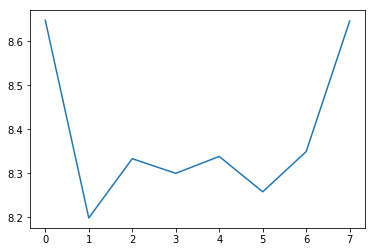

In [151]:
csv_2016['Rating'] = csv_2016['Rating'].apply(clean_rating)
plt.plot(find_means(csv_2016))

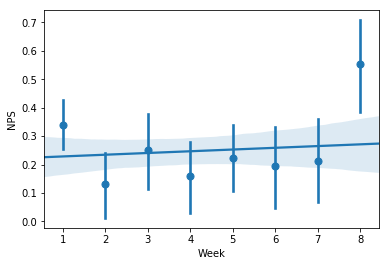

In [152]:
ax_nps = sns.regplot(x='Week', y='NPS', data=csv_2016, x_estimator=np.mean)